In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
data = sns.load_dataset("mpg")

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df = data[["weight", "mpg"]]

Text(0.5, 1.0, 'Weight vs MPG')

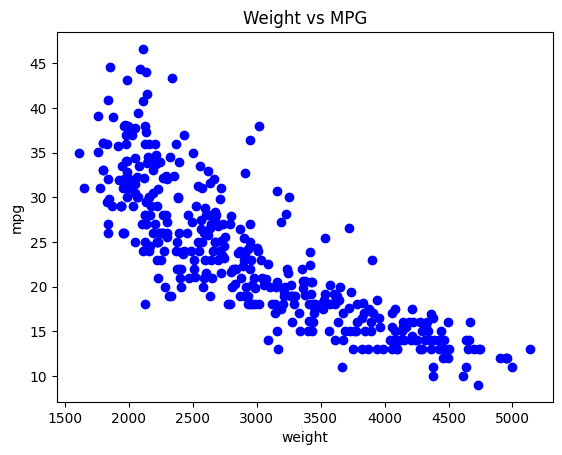

In [6]:
plt.scatter(df.weight, df.mpg, color="b")
plt.xlabel("weight")
plt.ylabel("mpg")
plt.title("Weight vs MPG")

In [7]:
x = df.weight
y = df.mpg

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

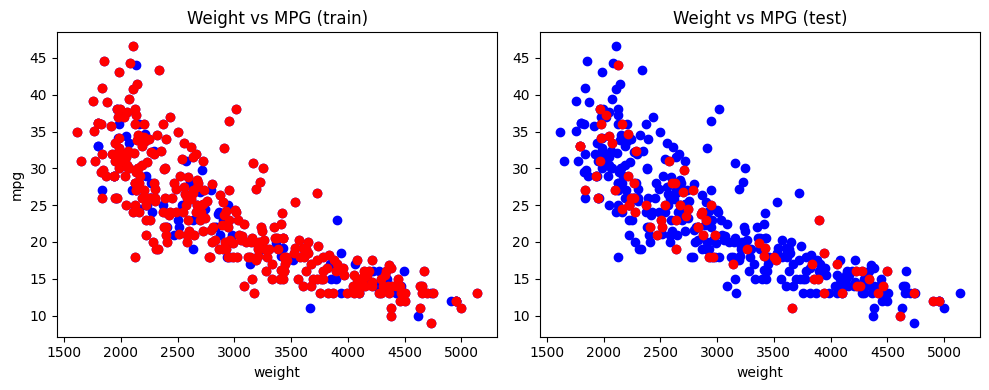

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.scatter(df.weight, df.mpg, color="b")
ax1.scatter(x_train, y_train, color="r")
ax1.set_xlabel("weight")
ax1.set_ylabel("mpg")
ax1.set_title("Weight vs MPG (train)")

ax2.scatter(df.weight, df.mpg, color="b")
ax2.scatter(x_test, y_test, color="r")
ax2.set_xlabel("weight")
ax2.set_title("Weight vs MPG (test)")

plt.tight_layout()

In [9]:
model = LinearRegression()
model.fit(x_train.to_frame(), y_train)

coef = model.coef_[0]
intercept = model.intercept_

print(f"coef: {coef}\nintercept: {intercept}")

coef: -0.007805242351594879
intercept: 46.78206336645047


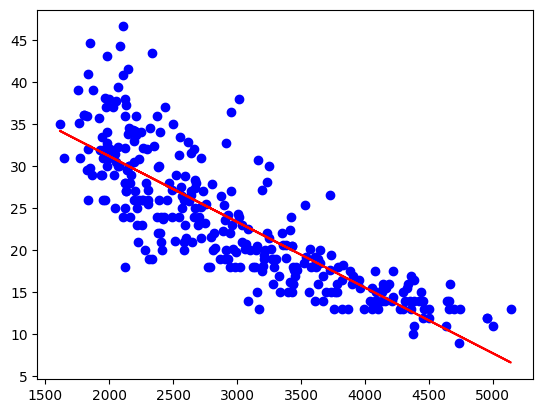

In [10]:
plt.scatter(x_train, y_train, color="b")
plt.plot(x_train, x_train * coef + intercept, color="r")

In [11]:
y_pred = model.predict(x_test.to_frame())

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.2f}")

MSE: 14.89
MAE: 3.12
R2: 0.72


In [12]:
r2_train = r2_score(y_train, model.predict(x_train.to_frame()))
r2_test = r2_score(y_test, y_pred)

print(f"Train: {r2_train:.2f}\nTest: {r2_test:.2f}\nDifference: {r2_train - r2_test:.4f}")

Train: 0.68
Test: 0.72
Difference: -0.0385


In [13]:
residuals = y_test - y_pred

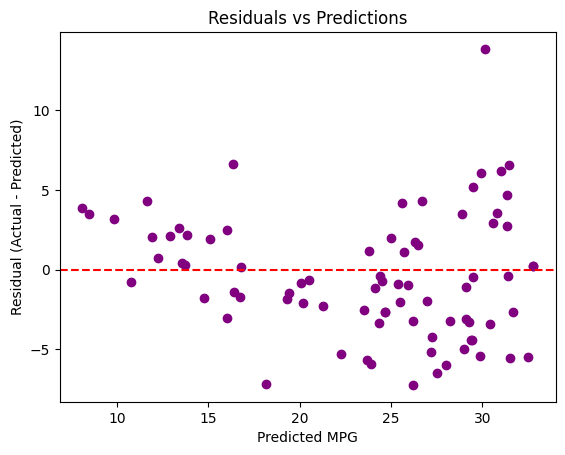

In [14]:
plt.scatter(y_pred, residuals, color="purple")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted MPG")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predictions")
plt.show()


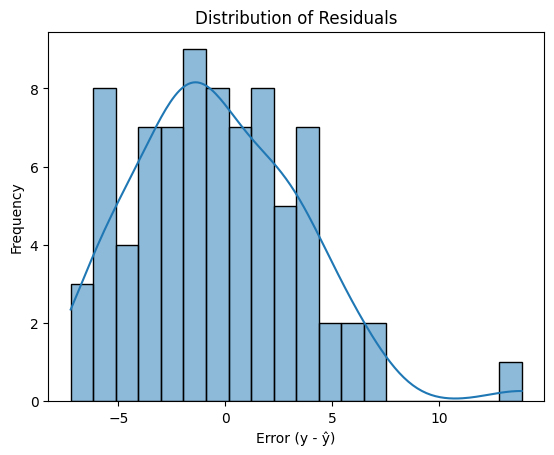

In [ ]:
sns.histplot(residuals, bins=20, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Error (y - ŷ)")
plt.ylabel("Frequency")
plt.show()